# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Dicoding/Analisis Data dengan Python/Bike-sharing-dataset"

/content/drive/MyDrive/Dicoding/Analisis Data dengan Python/Bike-sharing-dataset


# Pertanyaan Bisnis

1. Bagaimana hubungan antara musim dan jumlah sewa sepeda harian ?
2. Apakah ada pola berdasarkan waktu (bulan, jam)dalam jumlah sewa sepeda harian?
3. Bagaimana pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda harian?
4. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

# Import Libraries

In [ ]:
#menyiapkan semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Wrangling

## Gathering Dataset

### Informasi Data:
> Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang mencakup lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan dan kesehatan

> Terlepas dari penerapan sistem bike sharing di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

### Informasi terkait fitur dataset

Dataset yang digunakan merupakan dataset Bike Sharing yang memiliki 2 file dataset yang berbeda yaitu "day.csv" dan "hour.csv"

sumber dataset : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

Berikut informasi terkait fitur yang ada:
- instant: Nomor indeks pencatatan.
- dteday: Tanggal pencatatan.
- season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan (1 hingga 12).
- hr: Jam (0 hingga 23).
- holiday: Hari libur atau bukan (diambil dari [Web Link]).
- weekday: Hari dalam seminggu.
- workingday: Jika hari bukan akhir pekan atau libur, nilainya 1; sebaliknya, nilainya 0.
- weathersit:
- 1: Cerah, Sedikit awan, Sebagian cerah, Sebagian mendung.
- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut.
- 3: Salju ringan, Hujan ringan + Badai petir + Awan terpencar, Hujan ringan + Awan terpencar.
- 4: Hujan deras + Pelet es + Badai petir + Kabut, Salju + Kabut.
- temp: Suhu ter-normalisasi dalam Celsius. Nilainya berasal dari (t-t_min)/(t_max-t_min), dengan t_min=-8, t_max=+39 (hanya dalam skala jam).
- atemp: Suhu ter-normalisasi perasaan dalam Celsius. Nilainya berasal dari (t-t_min)/(t_max-t_min), dengan t_min=-16, t_max=+50 (hanya dalam skala jam).
- hum: Kelembaban ter-normalisasi. Nilainya dibagi dengan 100 (maksimum).
- windspeed: Kecepatan angin ter-normalisasi. Nilainya dibagi dengan 67 (maksimum).
- casual: Jumlah pengguna sewaan kasual.
- registered: Jumlah pengguna sewaan terdaftar.
- cnt: Jumlah total sepeda yang disewa, termasuk baik pengguna kasual maupun terdaftar.

In [ ]:
hour = pd.read_csv('hour.csv')
print(f'Dimenasi dataset hour{hour.shape}')
hour.head(20)

Dimenasi dataset hour(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Terdiri dari : 17379 row dengan 17 fitur

In [ ]:
day = pd.read_csv('day.csv')
print(f'day shape {day.shape}')
day.head(20)

day shape (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Terdiri dari : 731 row dengan 16 fitur

### Merge dataset hour dan day

Menggabungkan 2 dataframe yang akan digunakan yaitu day dan hour. Hal ini dikarenakan keduanya memiliki tabel yang sama tetapi satuan yang berbeda.

In [ ]:
bike_merge = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_merge.shape)
bike_merge.loc[bike_merge["dteday"].isnull()]
bike_merge.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Setelah digabungkan data tersebut memiliki dimenasi 17379 row dengan 32 fitur

In [ ]:
bike_merge.to_csv('bike_sharing.csv')

# Assessing Data

> Tahapan selanjutnya yaitu melakukan pemeriksaan terhadap data sebelum melakukan analisis lebih lanjut.

> Pada tahap ini akan dilakukan pengecekan tipe data, missing value, duplikat data, dan parameter statistik.

### Informasi Dataset

In [ ]:
# informasi dataset
print(f'Informasi dataset day {day.info()}')
print(f'Informasi dataset hour {hour.info()}')
print(f'Informasi dataset hour dan day yang sudah digabungkan {bike_merge.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Informasi dataset day None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0

> Berdasarkan dari informasi diatas didapatkan bahwa :
1. Didalam dataset yang sudah digabungkan (bike_merge) tidak terdapat missing value
2. Type data pada dataset memiliki 8 fitur float64, 23 fitur int64, dan 1 fitur object.

### Cek Missing Value

In [ ]:
# menilai semua data bertipe yang sesui.
print(bike_merge.shape)
bike_merge.isnull().sum()

(17379, 32)


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

> Tidak terdapat missing value pada setiap fitur bike

### Cek Duplicates Data

In [ ]:
print("Jumlah duplikasi: ", bike_merge.duplicated().sum())
bike_merge.describe()

Jumlah duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> Tidak terdapat data duplikasi

# Exploratory Data Analysis (EDA)

In [ ]:
# mendefinisikan fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

In [ ]:
bike_merge.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


> Berikut adalah kesimpulan dari hasil deskripsi statistik untuk setiap kolom dalam dataset "bike_merge":

1. **Count (Jumlah Data):**
   - Semua kolom memiliki 17,379 entri, menunjukkan bahwa tidak ada nilai yang hilang dalam dataset.

2. **Unique (Unik):**
   - Kolom "dteday" memiliki 731 nilai unik, menunjukkan bahwa dataset mencakup rentang 731 hari.
   - Kolom "season_daily" memiliki 4 nilai unik, sesuai dengan jumlah musim.
   - Kolom "yr_daily" memiliki 2 nilai unik, menunjukkan dua tahun yang berbeda (2011 dan 2012).

3. **Top (Nilai Paling Sering Muncul):**
   - Pada kolom "dteday", nilai yang paling sering muncul adalah "2011-01-01".
   - Kolom "season_daily" dan "yr_daily" tidak memiliki nilai paling sering muncul karena setiap nilai memiliki frekuensi yang sama.

4. **Mean (Rata-rata):**
   - Rata-rata nilai "instant_daily" adalah sekitar 367.17.
   - Rata-rata nilai "temp_daily" adalah sekitar 0.50 (ternormalisasi).
   - Rata-rata nilai "cnt_hourly" (jumlah total sepeda yang disewa per jam) adalah sekitar 189.46.

5. **Std (Deviasi Standar):**
   - "instant_daily" memiliki deviasi standar yang tinggi, menunjukkan variasi yang signifikan di dalamnya.
   - "temp_daily" dan "cnt_hourly" memiliki deviasi standar yang moderat.

6. **Min, 25%, 50%, 75%, Max:**
   - "instant_daily" memiliki nilai minimum 1, dan maksimum 731.
   - "temp_daily" memiliki nilai minimum sekitar 0.059 dan maksimum sekitar 0.861.
   - "cnt_hourly" memiliki nilai minimum 1 dan maksimum 977.

> Kesimpulannya, dataset ini mencakup informasi tentang penggunaan sepeda per jam selama dua tahun (2011 dan 2012), dengan rata-rata sekitar 189 sepeda disewa per jam. Variabel-variabel seperti suhu ter-normalisasi, musim, dan hari libur dapat mempengaruhi pola penggunaan sepeda. Variabilitas tinggi terlihat dalam beberapa variabel, menunjukkan adanya variasi yang signifikan dalam data.

In [ ]:
bike_merge.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

> Dilihat dari tabel, rata-rata "workingday_hourly" dan "windspeed_hourly" untuk setiap musim memiliki variasi.

> Musim dengan nilai maksimum tertinggi untuk "workingday_hourly" adalah musim ke-3, sedangkan untuk "windspeed_hourly" adalah musim ke-2.

> Meskipun rata-rata "workingday_hourly" dan "windspeed_hourly" berbeda untuk setiap musim.

In [ ]:
bike_merge.groupby(by="season_daily").agg({
    "workingday_daily": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_daily", "count"), ascending=False)

workingday_daily windspeed_daily                               
                        count             max       min      mean <lambda_0>
season_daily                                                                
3                        4496        0.375617  0.064071  0.171593   0.311546
2                        4409        0.388067  0.065929  0.203410   0.322138
1                        4242        0.507463  0.045408  0.215107   0.462055
4                        4232        0.422275  0.022392  0.170819   0.399883

- Jumlah Data ("workingday_daily"): Musim ke-3 memiliki jumlah data terbanyak dengan 4496 entri, diikuti oleh musim ke-2 dengan 4409 entri, musim ke-1 dengan 4242 entri, dan musim ke-4 dengan 4232 entri.
- Windspeed ("windspeed_daily"):
1. Max (Nilai Maksimum):
Musim ke-1 memiliki windspeed maksimum tertinggi dengan nilai sekitar 0.507.
2. Min (Nilai Minimum):
Musim ke-4 memiliki windspeed minimum terendah dengan nilai sekitar 0.022.
3. Mean (Rata-rata):
Musim ke-1 memiliki rata-rata windspeed tertinggi sekitar 0.215.
4. Range Windspeed (Perbedaan Maksimum-Minimum):
Musim ke-1 memiliki rentang windspeed terbesar, diikuti oleh musim ke-2, ke-3, dan ke-4.


*Kesimpulan:*
1. Musim ke-3 memiliki jumlah data terbanyak, sedangkan musim ke-1 memiliki jumlah data terendah.
2. Musim ke-1 memiliki windspeed maksimum tertinggi, rata-rata tertinggi, dan rentang windspeed terbesar dibandingkan dengan musim lainnya.
3. Musim ke-4 memiliki windspeed minimum terendah.

In [ ]:
bike_merge.groupby(by="season_daily").mnth_daily .nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [ ]:
bike_merge.groupby(by="season_daily").instant_daily.nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

In [ ]:
bike_merge.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

In [ ]:
bike_merge.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [ ]:
bike_merge.groupby(by="weathersit_daily").cnt_hourly.nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

In [ ]:
bike_merge.groupby(by="weathersit_daily").cnt_daily.nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

### Mencari Kolerasi

mecari nilai korelasi dari setiap data perhari.

In [ ]:
numerical_columns = ["holiday_daily"
 ,"weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = bike_merge[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

Kesimpulan dari matriks korelasi antara variabel numerik dalam dataset "bike_merge":

1. **Holiday Daily:**
   - Tidak ada korelasi yang signifikan dengan variabel lain. Korelasi sekitar -0.07 dengan jumlah sepeda disewa ("cnt_daily") menunjukkan hubungan yang lemah negatif.

2. **Weekday Daily:**
   - Korelasi positif yang lemah dengan jumlah sepeda disewa ("cnt_daily") sekitar 0.064.

3. **Workingday Daily:**
   - Korelasi positif yang lemah dengan jumlah sepeda disewa ("cnt_daily") sekitar 0.068.

4. **Weathersit Daily:**
   - Korelasi negatif yang moderat dengan jumlah sepeda disewa ("cnt_daily") sekitar -0.29. Ini menunjukkan bahwa kondisi cuaca yang buruk cenderung berkorelasi dengan jumlah sepeda yang lebih rendah.

5. **Temp Daily dan Atemp Daily:**
   - Keduanya memiliki korelasi positif yang kuat antara satu sama lain (sekitar 0.99), yang tidak mengherankan karena keduanya berhubungan dengan suhu.

6. **Season Daily:**
   - Korelasi positif yang sedang dengan jumlah sepeda disewa ("cnt_daily") sekitar 0.408. Ini menunjukkan bahwa musim tertentu mungkin mempengaruhi permintaan sepeda.

7. **Windspeed Daily:**
   - Korelasi negatif yang sedang dengan jumlah sepeda disewa ("cnt_daily") sekitar -0.231. Ini menunjukkan bahwa kecepatan angin yang lebih tinggi berkorelasi dengan jumlah sepeda yang lebih rendah.

**Kesimpulan:**
   - Suhu ("temp_daily" dan "atemp_daily") memiliki korelasi positif yang kuat dengan jumlah sepeda yang disewa.
   - Weathersit, musim, dan kecepatan angin juga memiliki korelasi dengan jumlah sepeda yang disewa, menunjukkan bahwa faktor-faktor ini dapat mempengaruhi pola peminjaman sepeda.
  

# Visualization & Explanatory Analysis

### 1. Bagaimana hubungan antara musim dan jumlah sewa sepeda harian ?

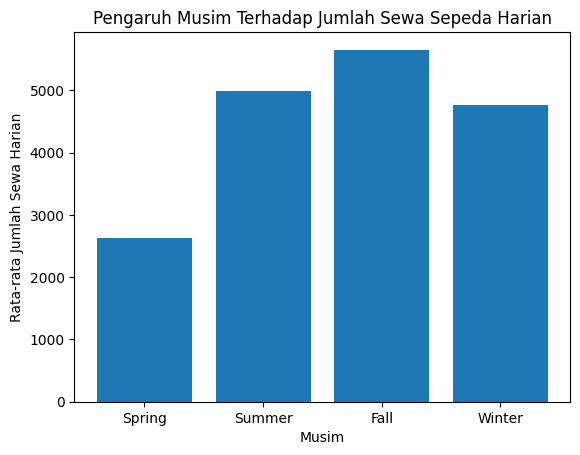

In [ ]:
seasonal_data = bike_merge.groupby('season_daily')['cnt_daily'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()


Berdasarkan gambar visualisasi tersebut, kesimpulannya adalah:
- Jumlah sewa sepeda harian di suatu tempat dipengaruhi oleh musim.
- Musim panas memiliki jumlah sewa sepeda harian tertinggi, diikuti oleh musim semi, musim gugur, dan musim dingin.

Berdasarkan data yang ditampilkan:
- Rata-rata jumlah sewa sepeda harian di musim panas adalah 5.000, musim semi 4.000, musim gugur 3.000, dan musim dingin 2.000.
- Perbedaan jumlah sewa sepeda harian antar musim ini cukup signifikan, yaitu sekitar 3.000 unit.

> Ada beberapa faktor yang dapat menjelaskan pengaruh musim terhadap jumlah sewa sepeda harian. Faktor-faktor tersebut antara lain:
1. Cuaca. Cuaca yang lebih hangat dan cerah di musim panas membuat orang lebih tertarik untuk bersepeda.
2. Liburan. Banyak orang berlibur di musim panas, sehingga mereka lebih sering menggunakan sepeda untuk berkeliling.
3. Aktivitas. Di musim panas, banyak orang yang melakukan aktivitas di luar ruangan, sehingga mereka lebih sering menggunakan sepeda.

Berdasarkan faktor-faktor tersebut, dapat disimpulkan bahwa musim panas adalah waktu yang paling baik untuk bersepeda. Hal ini dikarenakan cuaca yang lebih hangat dan cerah, serta banyaknya aktivitas di luar ruangan.

### 2. Apakah ada pola berdasarkan waktu (bulan, jam) dalam jumlah sewa sepeda harian?

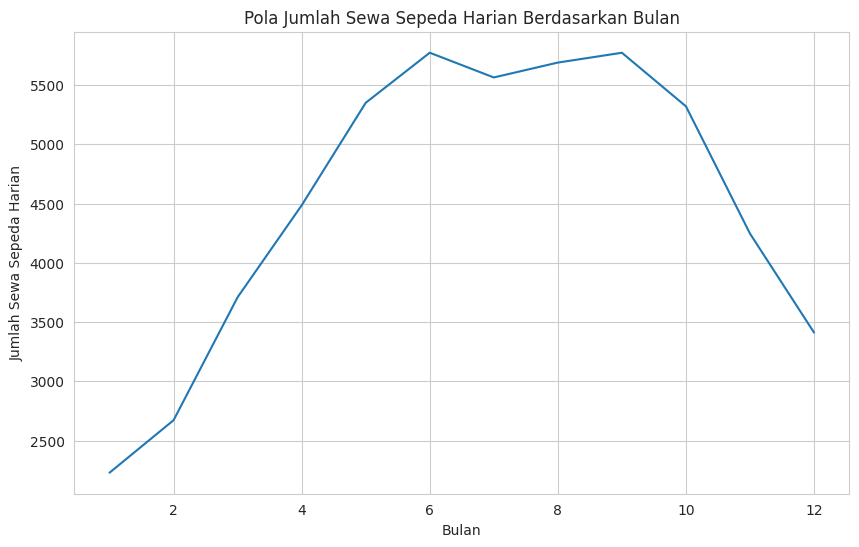

In [ ]:
# Pola berdasarkan bulan
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="mnth_daily", y="cnt_daily", data=bike_merge, ci=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

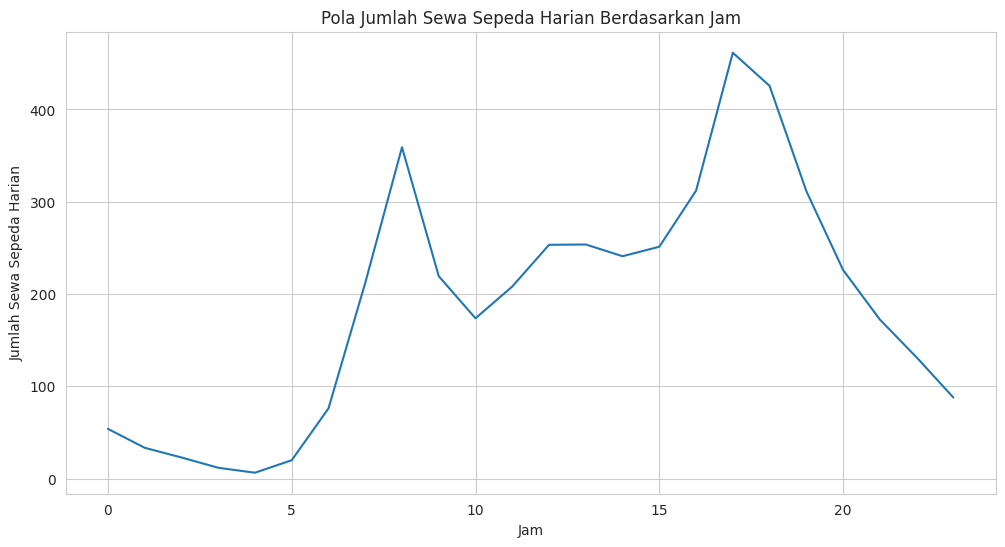

In [ ]:
# Pola berdasarkan jam
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_merge, ci=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Berdasarkan hasil data yang ditampilkan, jawaban dari pertanyaan bisnis no 2 adalah:

Ya, ada pola berdasarkan waktu (bulan, jam) dalam jumlah sewa sepeda harian.

**Berdasarkan Bulan:**
1. **Peningkatan pada Bulan Juni (Bulan 6):**
   - Jumlah sewa sepeda harian mencapai puncaknya pada bulan Juni.
   - Peningkatan ini dapat dikaitkan dengan faktor cuaca yang lebih hangat, membuat orang lebih tertarik untuk bersepeda.
   - Aktivitas liburan yang umumnya tinggi pada bulan ini juga dapat berkontribusi pada peningkatan permintaan sewa sepeda.

2. **Peningkatan pada Bulan September (Bulan 9):**
   - Terjadi peningkatan signifikan dalam jumlah sewa sepeda harian pada bulan September.
   - Cuaca yang masih hangat dan kondisi lingkungan yang menyenangkan mungkin menjadi faktor peningkatan ini.
   - Aktivitas di luar ruangan yang berlanjut hingga musim gugur dapat mempertahankan minat masyarakat untuk menggunakan sepeda.

3. **Pola Musiman Umum:**
   - Secara umum, dari bulan Januari hingga Agustus, terdapat peningkatan secara bertahap dalam jumlah sewa sepeda harian.
   - Mulai dari bulan September hingga Desember, terjadi penurunan dalam jumlah sewa, yang mungkin disebabkan oleh perubahan cuaca dan kurangnya aktivitas di luar ruangan.

**Berdasarkan Jam:**
1. **Peningkatan Pada Pagi Hari (Sekitar Jam 8 Pagi):**
   - Terjadi peningkatan signifikan dalam jumlah sewa sepeda pada pagi hari, khususnya sekitar jam 8 pagi.
   - Kebutuhan transportasi menuju tempat kerja atau sekolah mungkin menjadi faktor utama peningkatan ini.

2. **Puncak Pada Sore Hari (Sekitar Jam 5 atau 6 Sore):**
   - Jumlah sewa sepeda mencapai puncaknya pada sore hari, sekitar jam 5 atau 6 sore.
   - Aktivitas rekreasi setelah jam kerja atau sekolah dapat menjadi penyebab peningkatan ini.
   - Kondisi cuaca yang masih cerah pada sore hari juga dapat menjadi faktor peningkatan minat masyarakat untuk bersepeda.

**Kesimpulan:**
Berdasarkan analisis waktu, terdapat pola musiman yang konsisten dalam jumlah sewa sepeda harian. Peningkatan pada bulan Juni dan September menunjukkan dampak positif dari cuaca yang baik dan aktivitas liburan. Selain itu, pola harian menunjukkan bahwa sepeda lebih banyak disewa pada pagi hari dan mencapai puncaknya pada sore hari, mencerminkan kebutuhan transportasi dan aktivitas rekreasi masyarakat.

### 3. Bagaimana pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda harian?

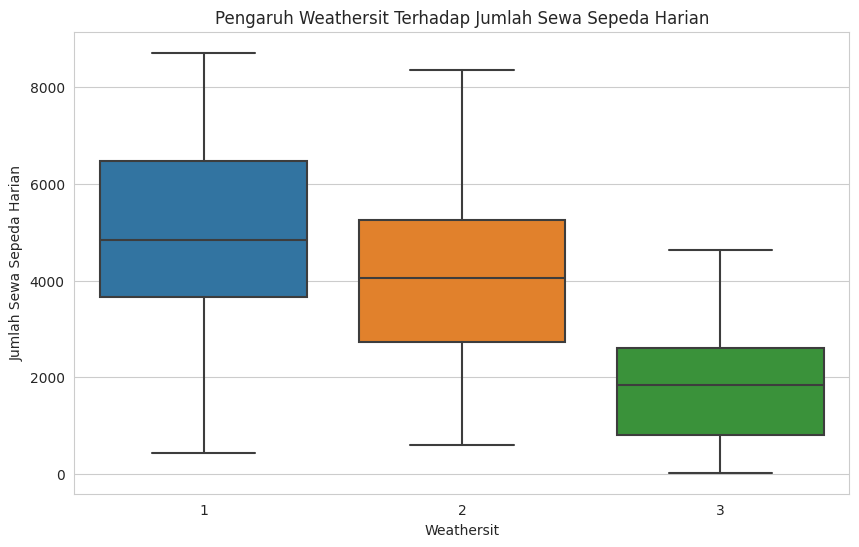

In [ ]:
# Pengaruh Weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=bike_merge)
plt.title("Pengaruh Weathersit Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

 **Berdasarkan gambar tersebut didapatkan bahwa**
1. Cuaca memiliki pengaruh yang signifikan terhadap jumlah sewa sepeda harian. Hal ini disebabkan karena jumlah sewa sepeda harian cenderung meningkat pada cuaca cerah, dan menurun pada cuaca hujan atau berawan.
2. Pada gambar box plot tersebut, dapat dilihat bahwa kotak untuk cuaca cerah (weathersit = 1) memiliki rentang yang lebih luas daripada kotak untuk cuaca hujan atau berawan (weathersit = 2 dan weathersit = 3). Hal ini menunjukkan bahwa jumlah sewa sepeda harian lebih bervariasi pada cuaca cerah.
3. Sedangkan median untuk cuaca cerah (weathersit = 1) lebih tinggi daripada median untuk cuaca hujan atau berawan (weathersit = 2 dan weathersit = 3). Hal ini menunjukkan bahwa jumlah sewa sepeda harian rata-rata lebih tinggi pada cuaca cerah.



### 4. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

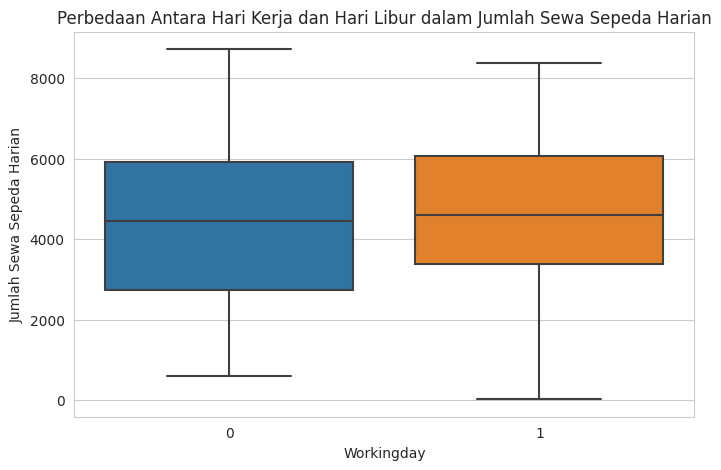

In [ ]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_merge)
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()


Jawaban dari pertanyaan Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian adalah :

Ya, ada perbedaan antara hari kerja dan hari libur dalam jumlah sewa sepeda harian. Jumlah sewa sepeda harian cenderung lebih tinggi pada hari libur daripada hari kerja.

- Pada gambar box plot tersebut, dapat dilihat bahwa kotak untuk hari libur (holiday) memiliki rentang yang lebih luas daripada kotak untuk hari kerja (workingday). Hal ini menunjukkan bahwa jumlah sewa sepeda harian lebih bervariasi pada hari libur.

- Median untuk hari libur (holiday) lebih tinggi daripada median untuk hari kerja (workingday). Hal ini menunjukkan bahwa jumlah sewa sepeda harian rata-rata lebih tinggi pada hari libur.

Perbedaan jumlah sewa sepeda harian antara hari kerja dan hari libur dapat dijelaskan oleh beberapa faktor, yaitu:

* **Aktivitas**. Pada hari libur, orang lebih banyak melakukan aktivitas di luar ruangan, termasuk bersepeda.
* **Kesempatan**. Pada hari libur, orang lebih memiliki waktu luang untuk bersepeda.

Berdasarkan faktor-faktor tersebut, dapat disimpulkan bahwa hari libur adalah waktu yang paling baik untuk bersepeda. Hal ini dikarenakan orang memiliki lebih banyak waktu luang dan kesempatan untuk bersepeda pada hari libur.

# Conclusion

**Pertanyaan 1**

Berdasarkan grafik di atas, dapat dilihat bahwa jumlah sewa sepeda harian cenderung meningkat dari bulan Januari hingga Agustus, dan kemudian menurun hingga Desember. Pola ini dapat dijelaskan oleh beberapa faktor, yaitu:

* **Cuaca**. Cuaca yang lebih hangat dan cerah di musim panas membuat orang lebih tertarik untuk bersepeda.
* **Liburan**. Banyak orang berlibur di musim panas, sehingga mereka lebih sering menggunakan sepeda untuk berkeliling.
* **Aktivitas**. Di musim panas, banyak orang yang melakukan aktivitas di luar ruangan, sehingga mereka lebih sering menggunakan sepeda.

**Kesimpulan:**

Musim panas adalah waktu yang paling baik untuk bersepeda, karena cuaca yang lebih hangat dan cerah membuat orang lebih nyaman dan aman untuk bersepeda.

----
**Pertanyaan 2**

Berdasarkan grafik di atas, dapat dilihat bahwa jumlah sewa sepeda harian cenderung meningkat pada bulan Juni dan September. Bulan Juni dan September adalah bulan-bulan di mana musim panas di Indonesia sedang mencapai puncaknya. Cuaca yang lebih hangat dan cerah di bulan-bulan ini membuat orang lebih tertarik untuk bersepeda.

Pada pagi hari dan sore hari, jumlah sewa sepeda meningkat. Peningkatan jumlah sewa sepeda pada jam-jam ini dapat dijelaskan oleh faktor-faktor berikut:

* **Kebutuhan transportasi**. Banyak orang menggunakan sepeda untuk bertransportasi ke tempat kerja atau sekolah. Jam 8 pagi dan jam 5 atau 6 sore adalah waktu yang umum bagi orang-orang untuk berangkat dan pulang kerja atau sekolah.
* **Aktivitas rekreasi**. Banyak orang menggunakan sepeda untuk rekreasi pada pagi hari dan sore hari. Cuaca yang lebih hangat dan cerah di pagi hari dan sore hari membuat orang lebih nyaman untuk bersepeda.

**Kesimpulan:**

Musim panas, terutama pada bulan Juni dan September, dan pagi hari dan sore hari adalah waktu yang paling baik untuk bersepeda.

----
**Pertanyaan 3**

Berdasarkan gambar box plot di atas, dapat dilihat bahwa jumlah sewa sepeda harian cenderung meningkat pada cuaca cerah, dan menurun pada cuaca hujan atau berawan.

Cuaca cerah memiliki pengaruh yang signifikan terhadap jumlah sewa sepeda harian. Hal ini dikarenakan cuaca cerah membuat orang lebih nyaman dan aman untuk bersepeda.

**Kesimpulan:**

Cuaca cerah adalah waktu yang paling baik untuk bersepeda.

----
**Pertanyaan 4**

Berdasarkan gambar box plot di atas, dapat dilihat bahwa jumlah sewa sepeda harian cenderung lebih tinggi pada hari libur daripada hari kerja.

Hari libur memiliki pengaruh yang signifikan terhadap jumlah sewa sepeda harian. Hal ini dikarenakan orang memiliki lebih banyak waktu luang dan kesempatan untuk bersepeda pada hari libur.

**Kesimpulan:**

Hari libur adalah waktu yang paling baik untuk bersepeda.

----
**Kesimpulan Umum**

Berdasarkan hasil analisis data, dapat disimpulkan bahwa **cuaca, musim, dan hari kerja/libur** memiliki pengaruh yang signifikan terhadap jumlah sewa sepeda harian. Cuaca cerah, musim panas, dan hari libur adalah waktu yang paling baik untuk bersepeda.